# CS 457 - Homework Assignment 7: Classification
## Name: Muhammad Areeb Kazmi
## Email ID: mk07202@st.habib.edu.pk

In [15]:
# Importing required libraries

import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [16]:
# importing data into data frame from the csv file
df = pd.read_csv('Admission_Chance_Classification.csv')
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,YES,YES
1,324,107,4,4.0,4.5,8.87,YES,YES
2,316,104,3,3.0,3.5,8.00,YES,YES
3,322,110,3,3.5,2.5,8.67,YES,YES
4,314,103,2,2.0,3.0,8.21,NO,YES


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3    SOP               400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Admit              400 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.1+ KB


## Question 1
Create a train and test set. Consider Admit column as class/label column (Y) and use
rest of the columns as inputs (X). Use 30% (test_size=0.3) records for test set. Use the
same train and test set for all your analysis with different classifiers.

## Question 2
In your code, set the seed after you read the data. This will keep your data and
calculation consistent throughout the analysis irrespective of multiple runs. See the
example code for the class random_state=99

In [18]:
# Encode categorical variables ('Research' and 'Admit')
df['Research'] = df['Research'].map({'YES': 1, 'NO': 0})
df['Admit'] = df['Admit'].map({'YES': 1, 'NO': 0})

# Separate features (X) and target (Y)
y = df['Admit']
X = df.drop(columns=['Admit'])

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)

# Display the sizes of the resulting dfsets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((280, 7), (120, 7), (280,), (120,))

## Question 3
Create a classification model to predict Admit status using Decision Tree. Visualize
the decision tree. Interpret the decision tree. Discuss which attributes are important
and which are not important.

In [19]:
#Initializing a Decision Tree classifier
d_tree = tree.DecisionTreeClassifier(random_state=99)

#Training the classifier on training data
d_tree.fit(X_train, y_train)

#Getting feature importances
d_tree.feature_importances_

array([0.15284411, 0.02087641, 0.03434293, 0.17808246, 0.04414848,
       0.56970561, 0.        ])

This array shows the importance of every feature i.e. how much this feature contributes in the decision making. Higher values shows high importance.

In [20]:
# Using the training data to predict the response variable

train_res = d_tree.predict(X_train)
train_res

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# Checking the accuracy of prediction by comparing it to actual y data

accuracy_score(y_train, train_res) * 100

100.0

In [22]:
# Making predictions on the test data
Y_pred = d_tree.predict(X_test)
Y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
# Checking the accuracy of the score
accuracy_score(y_test, Y_pred) * 100

87.5

In [24]:
# Looking at the decision tree formed
text_representation = tree.export_text(d_tree)
print(text_representation)

|--- feature_5 <= 7.66
|   |--- feature_0 <= 301.00
|   |   |--- class: 0
|   |--- feature_0 >  301.00
|   |   |--- feature_3 <= 2.25
|   |   |   |--- feature_5 <= 7.55
|   |   |   |   |--- feature_4 <= 2.25
|   |   |   |   |   |--- feature_3 <= 1.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  1.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  2.25
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  7.55
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  2.25
|   |   |   |--- class: 1
|--- feature_5 >  7.66
|   |--- feature_5 <= 8.20
|   |   |--- feature_4 <= 1.75
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  1.75
|   |   |   |--- feature_3 <= 3.75
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_1 <= 97.50
|   |   |   |   |   |   |--- feature_3 <= 1.75
|   |   |   |   |   |   |   

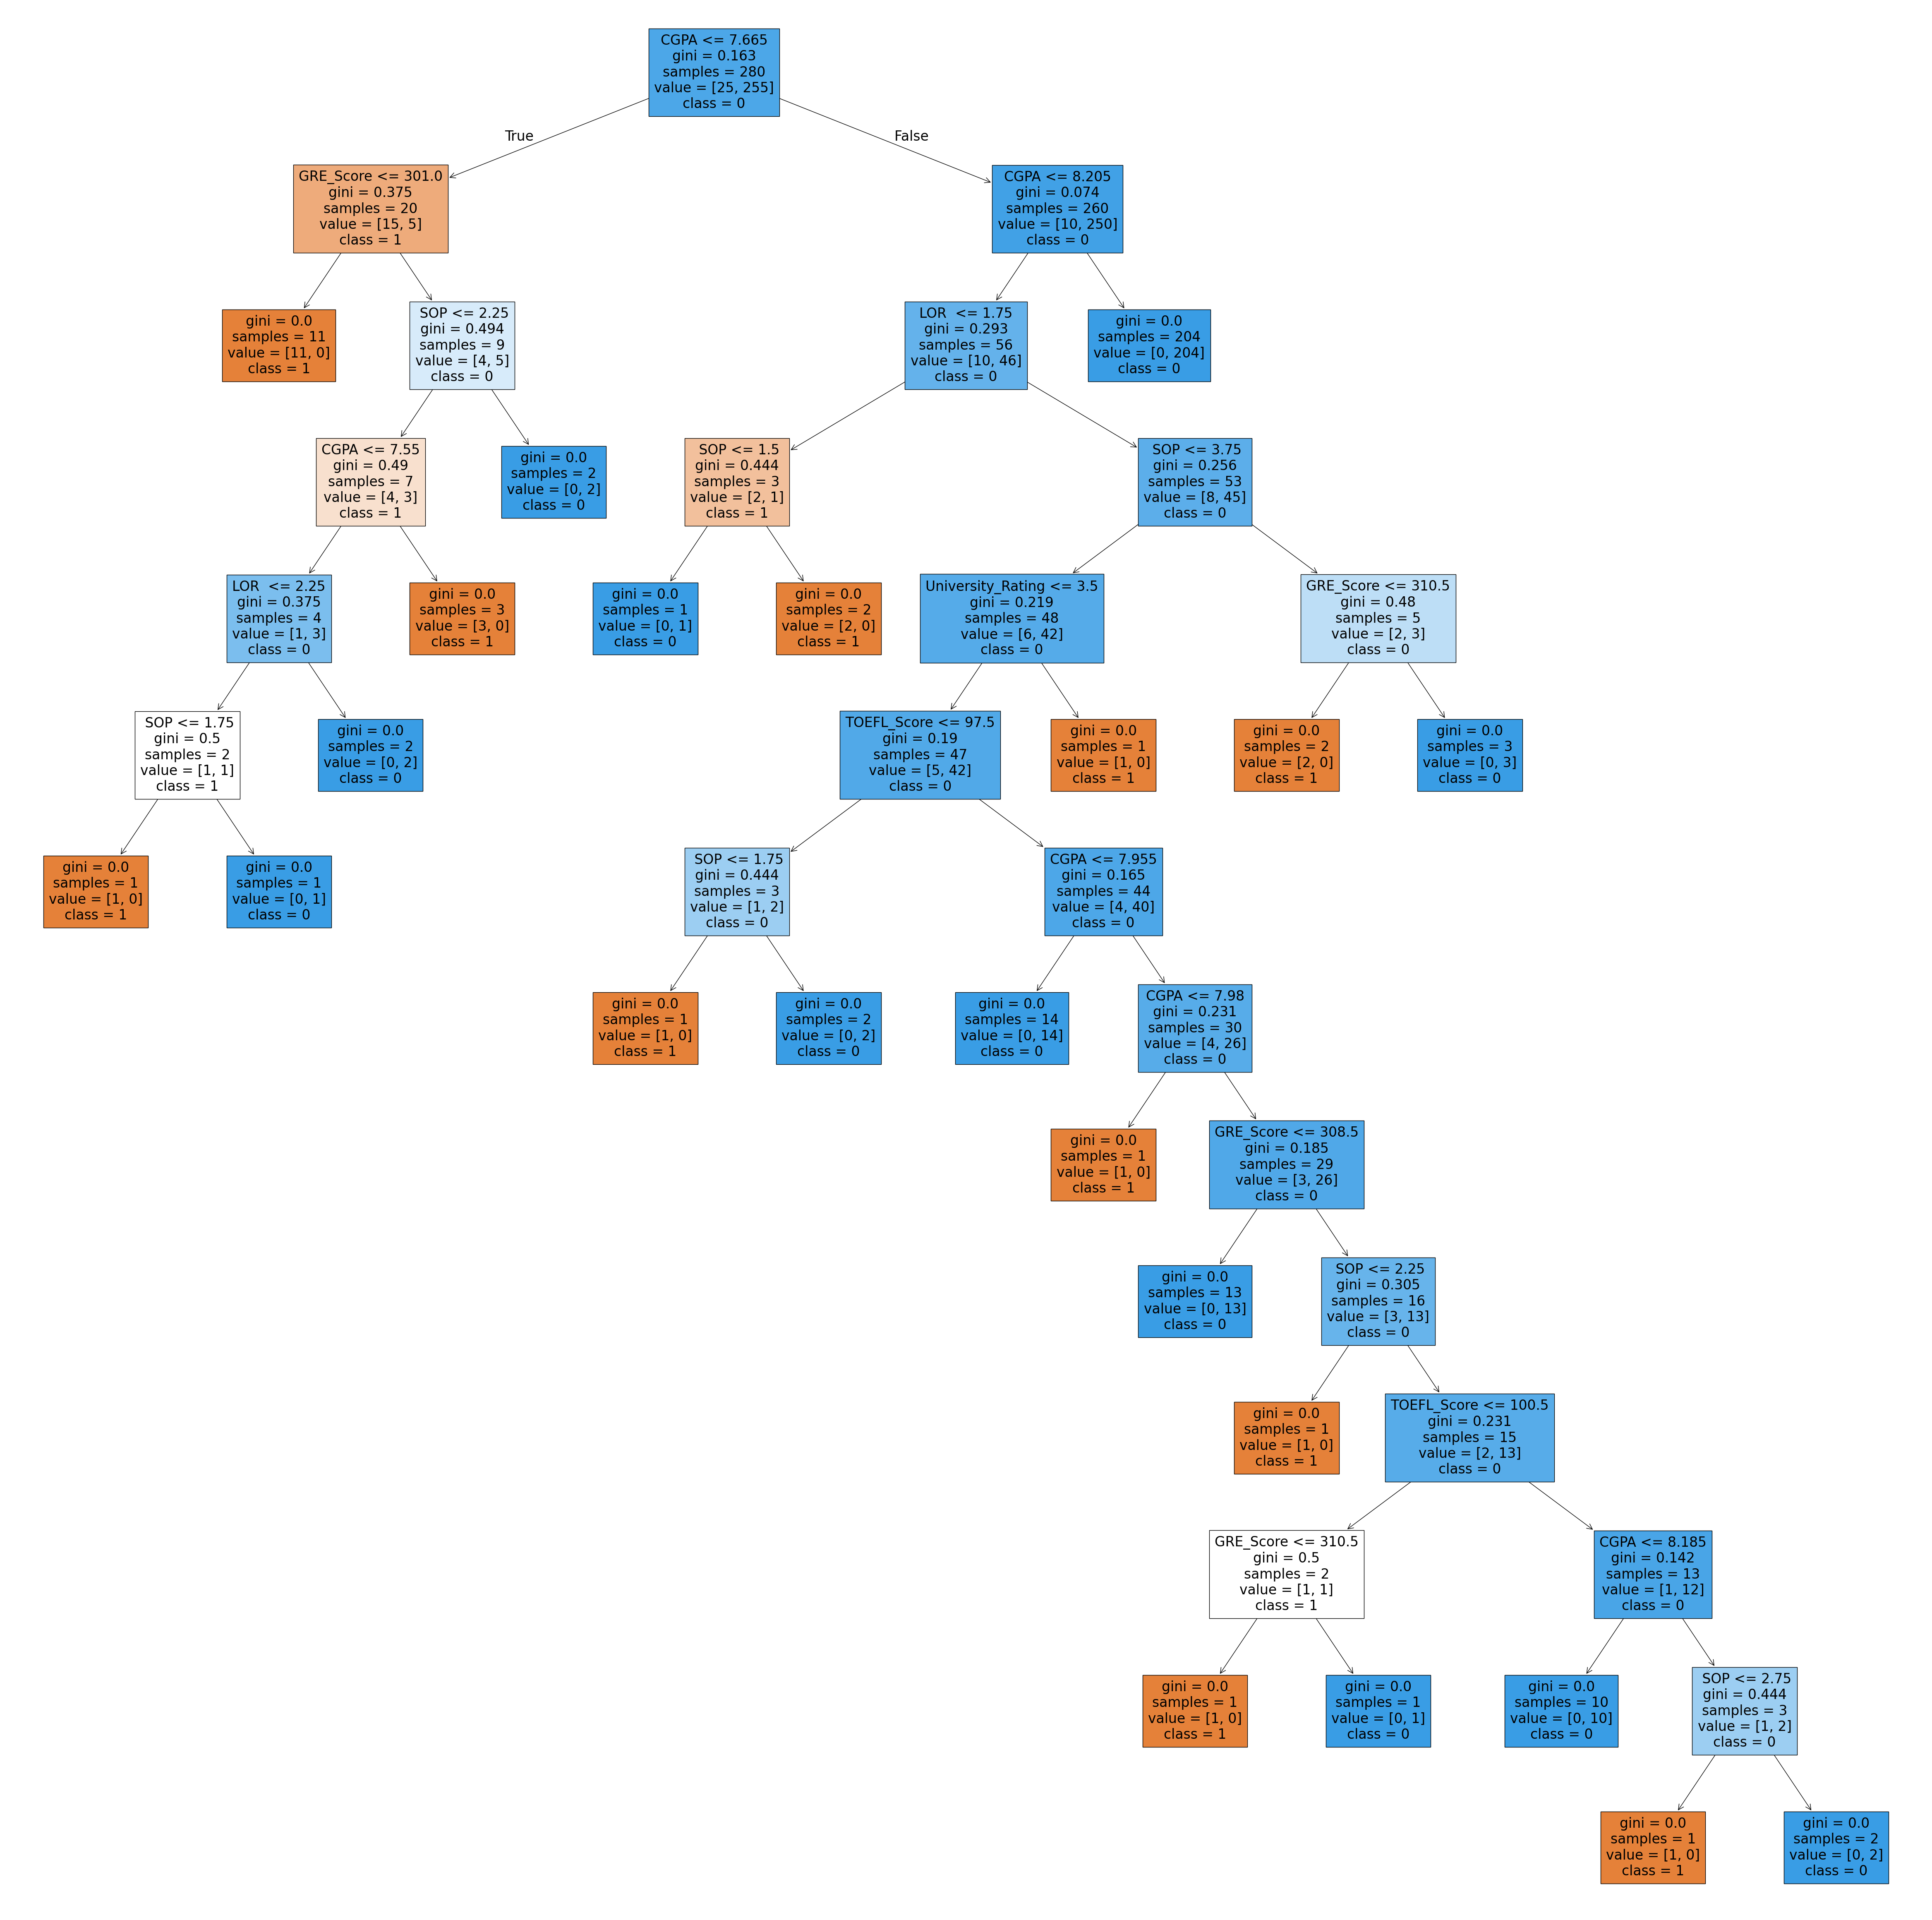

In [25]:
# Visualizing the decision tree
fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(d_tree,
                   feature_names=list(X.columns),
                   class_names=y.unique().astype(str).tolist(),
                   filled=True)

**Observation:** Lookng at the decision tree, it is clear that the primary attribute for determining the classification outcome is CGPA which suggest that an individual's CGPA is the most significant predictor for admission. Following it, GRE score is also one of the important feature. These features suggest a model heavily weighted towards an applicant's academic performance for admission acceptance.

Further down the tree, gini and SOP indicate that the the Statement of Purpose and the exam score further are taken into account, reinforcing pivotal role in the decision-making process, likely reflecting the applicant's academic and intellectual performance.

Other branches involving TOEFL_score are less dominant, indicating the model's nuanced approach to educational scores and other grading criteria.

## Question 4
Perform the Tree Pruning Analysis and evaluate the results. Visualize the tree after
pruning. Discuss the tree and overall results before and after pruning

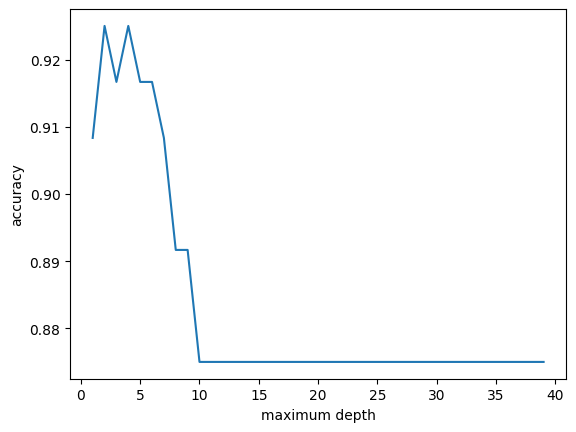

In [27]:
max_depth = list(range(1, 40))
acc = []
for i in max_depth:
    dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=99)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

data = pd.DataFrame({'acc': acc, 'maxdepth': max_depth})
plt.plot('maxdepth', 'acc', data=data)
plt.xlabel('maximum depth')
plt.ylabel('accuracy')
plt.show()

This graphs shows that we have maximum accuracy when the depth of tree is zero which is not practically possible. So I have decided to look at the next absolute maximums (calculus concept) to select the suitable depth of tree. So for the pruned model I have decided to take depth 4 to get better results.

In [28]:
# Making the pruned model
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=99)
dtree = dtree.fit(X_train, y_train)
pred = dtree.predict(X_train)
acc = accuracy_score(pred, y_train)
print( "Training accuracy ",acc * 100)


Training accuracy  96.78571428571429


In [29]:
# Looking at the decision tree formed
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 7.66
|   |--- feature_0 <= 301.00
|   |   |--- class: 0
|   |--- feature_0 >  301.00
|   |   |--- feature_3 <= 2.25
|   |   |   |--- feature_5 <= 7.55
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  7.55
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  2.25
|   |   |   |--- class: 1
|--- feature_5 >  7.66
|   |--- feature_5 <= 8.20
|   |   |--- feature_4 <= 1.75
|   |   |   |--- feature_5 <= 8.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  8.01
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  1.75
|   |   |   |--- feature_3 <= 3.75
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  3.75
|   |   |   |   |--- class: 1
|   |--- feature_5 >  8.20
|   |   |--- class: 1



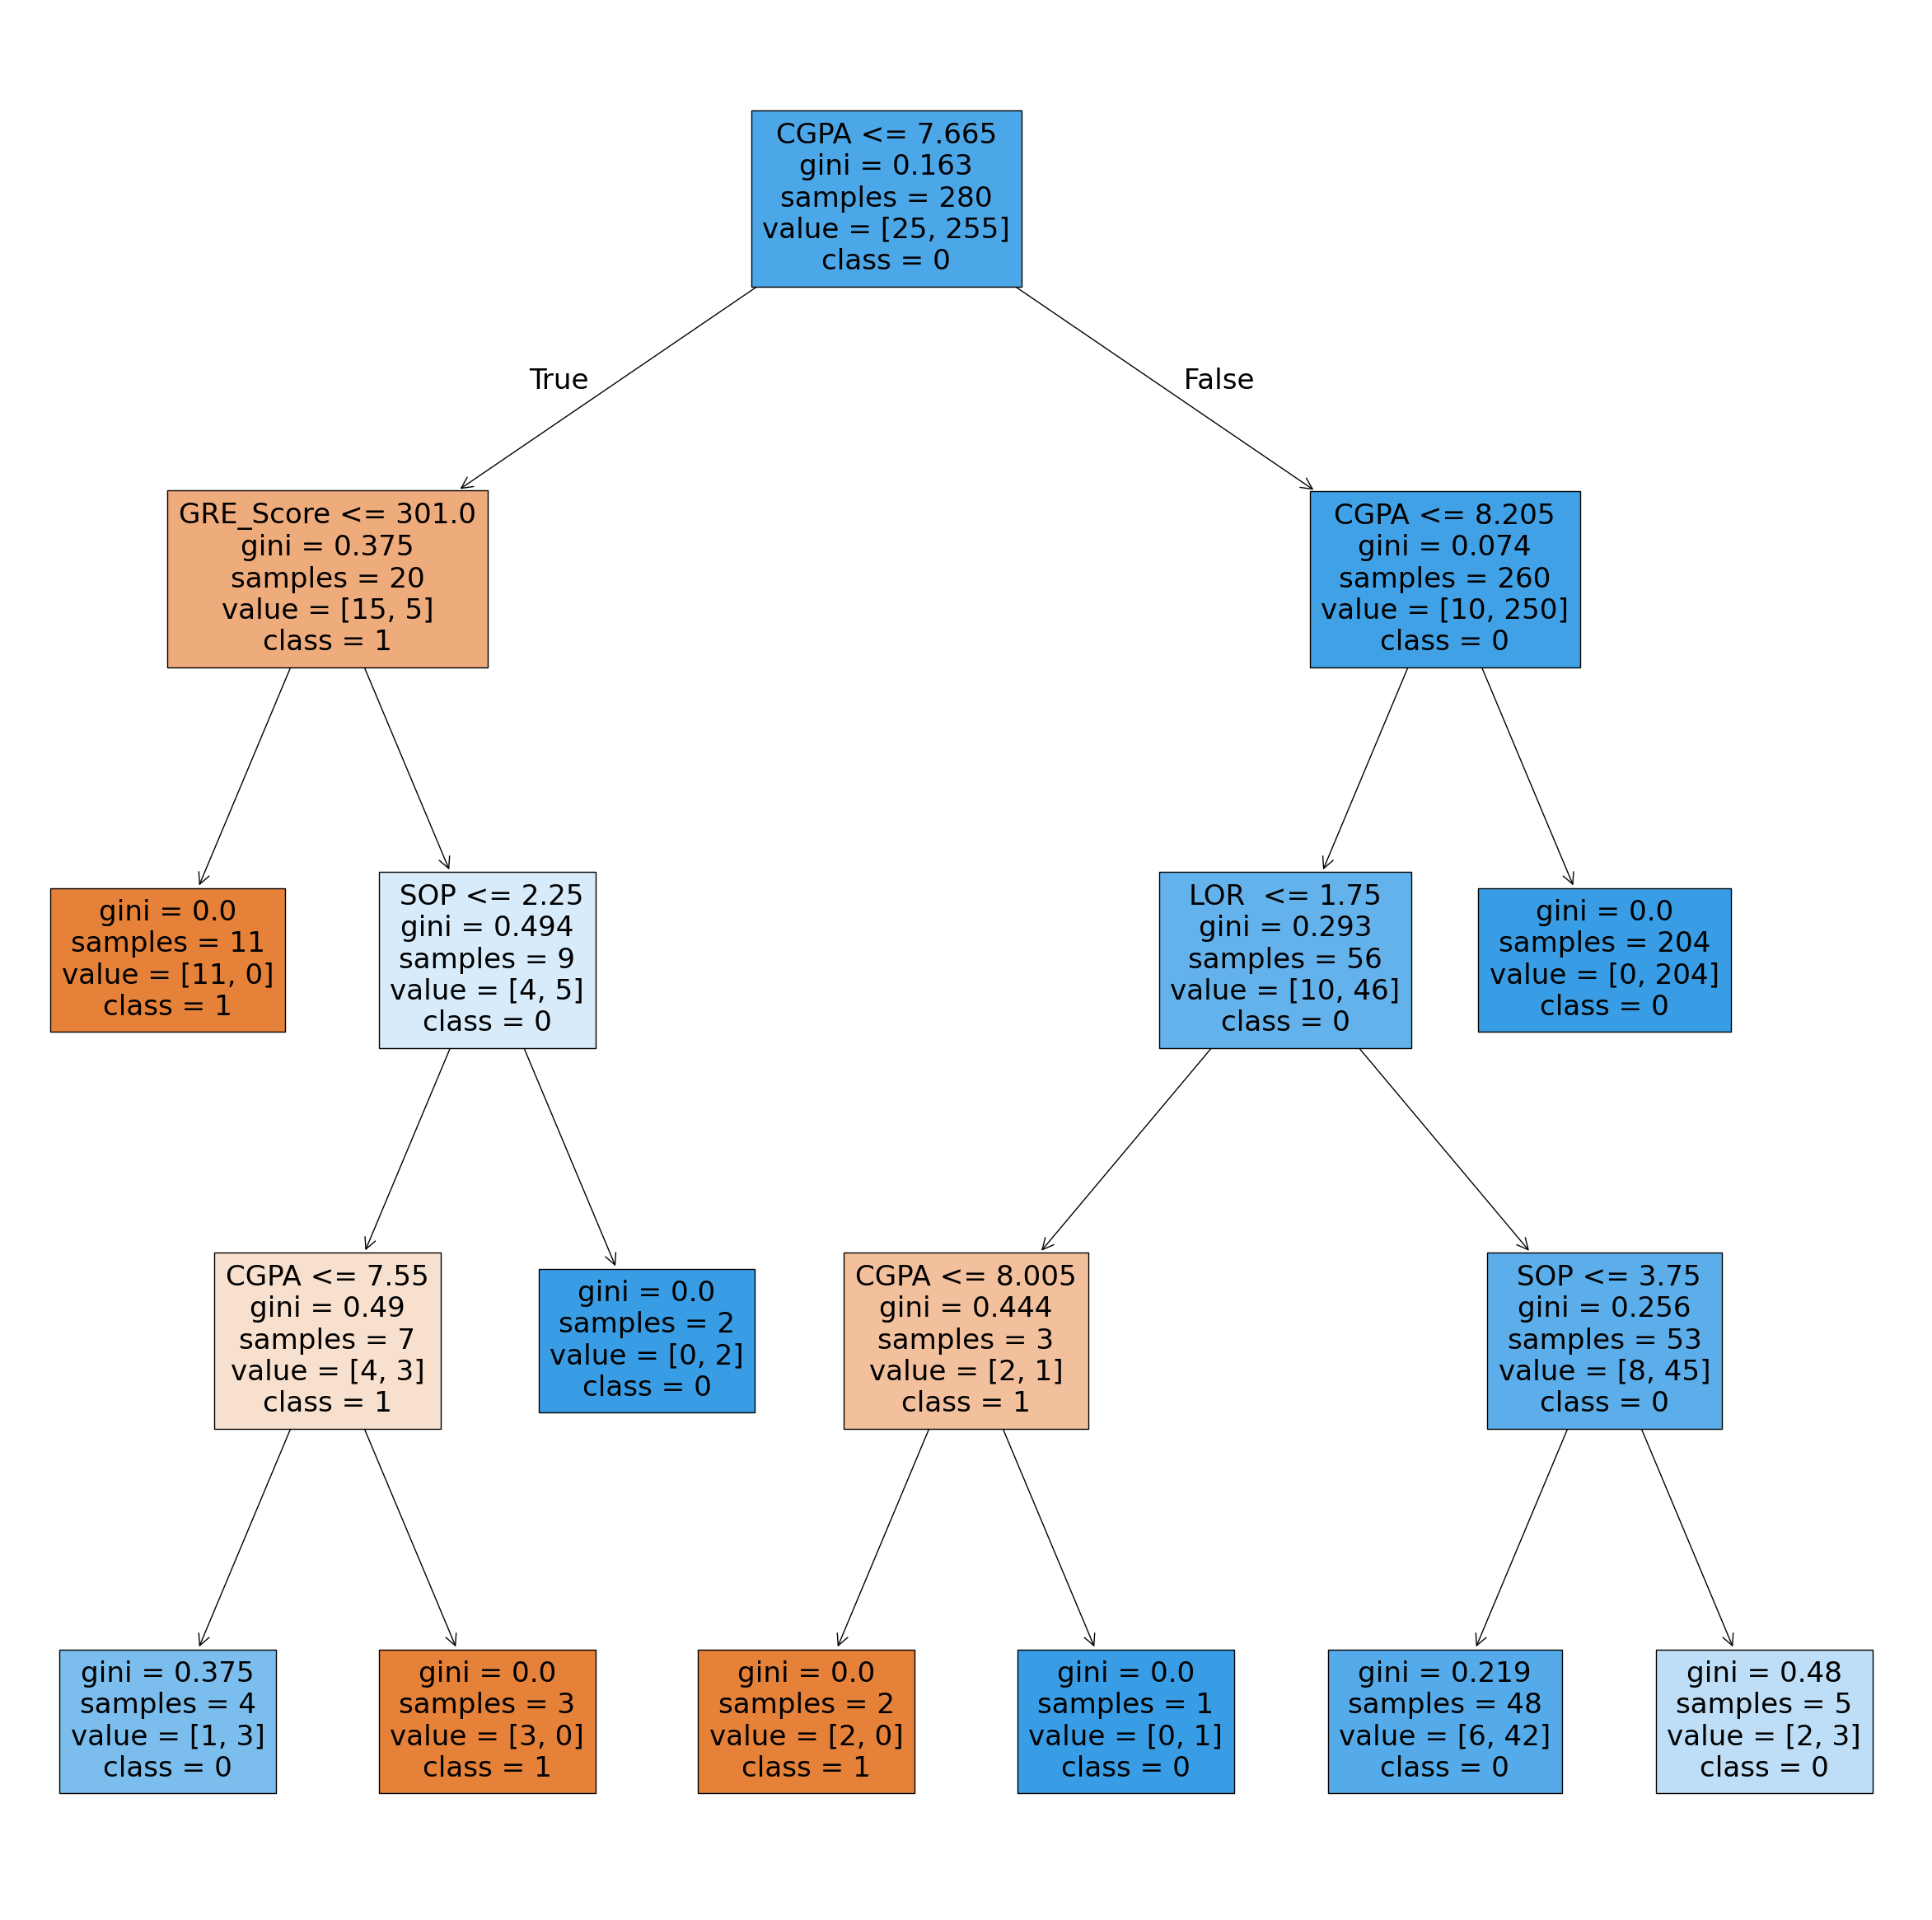

In [30]:
# Visualizing the decision tree
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dtree,
                   feature_names=list(X.columns),
                   class_names=y.unique().astype(str).tolist(),
                   filled=True)

**Observation:** The initial decision tree model presented a classic case of overfitting, with perfect training accuracy at 100% but a substantially lower testing accuracy of around 87.3%. A graphical analysis elaborated on this by showing a decrease in accuracy with increased tree depth, which is a typical symptom of a model learning too much noise from the training set.

In response, pruning was employed to simplify the model by limiting its depth to just 4 levels. This strategic move reduced the training accuracy to 96.7%, which might seem counterintuitive but is actually beneficial. The pruned model demonstrated an enhanced testing accuracy and a much narrower accuracy gap—a mere 1% between training and testing. This notable improvement underscores the efficacy of pruning in curtailing overfitting, enabling the model to retain only the most significant features that contribute to a robust and more accurate prediction on new data.

## Question 5
Create a classification model to predict Admit status using RandomForest. Include
all the analysis steps including variable importance plot. Try at least 5 different values
of n_estimators (number of trees) such as 10, 50, 100, 150, 200 and compare the
classification accuracy for each of them. Pick the best model (based on n_estimators)
for your final comparison.

In [36]:
for n_estimators in range(1, 250, 50):
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=99)
    forestModel = forest.fit(X_train, y_train)

    pred_train = forestModel.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train) * 100

    pred_test = forestModel.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test) * 100

    print('Number of Trees: {}, Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(n_estimators, train_acc, test_acc))

Number of Trees: 1, Training Accuracy: 96.79, Testing Accuracy: 87.50
Number of Trees: 51, Training Accuracy: 100.00, Testing Accuracy: 90.83
Number of Trees: 101, Training Accuracy: 100.00, Testing Accuracy: 90.83
Number of Trees: 151, Training Accuracy: 100.00, Testing Accuracy: 92.50
Number of Trees: 201, Training Accuracy: 100.00, Testing Accuracy: 91.67


Text(0.5, 0, 'Random Forest Feature Importance')

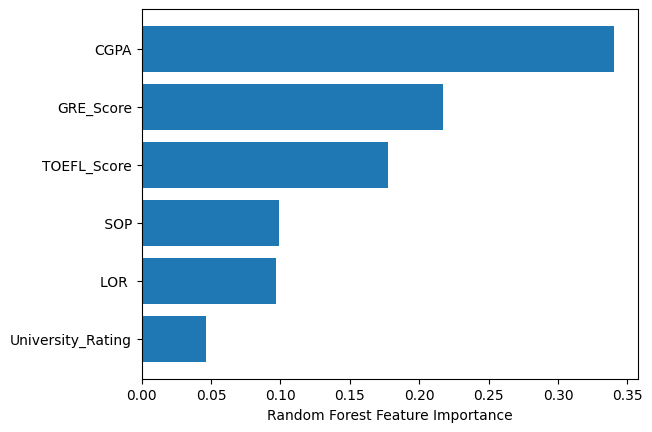

In [39]:
#Using fourth estimator as it gives joint highest testing accuracy of  91.67
n_estimators = 201

forest = RandomForestClassifier(n_estimators=n_estimators, random_state=99)
forestModel = forest.fit(X_train, y_train)
pred_train = forestModel.predict(X_train)
pred_test = forestModel.predict(X_test)

#Calculating feature importances and sorting them
sorted_idx = forestModel.feature_importances_.argsort()

#Plotting the top 20 feature importances
sorted_idx = forestModel.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][1:10], forestModel.feature_importances_[sorted_idx][1:10])
plt.xlabel("Random Forest Feature Importance")


***Observation:** We picked the most highest n_estimator, 201, based on aaccuracy and the bar chart correctly illustrates the significance of each feature, where ""CGPA", "GRE", and "TOEFL_Score" are the most crtical features.

### Question 6
Report the comparison between Decision Tree and RandomForest in terms of
classification performance.

In [40]:
# Report the comparison between Decision Tree and RandomForest in terms of classification performance.

dt_score = cross_val_score(dtree, X, y, cv=10)
print('Decision Tree score: ', dt_score.mean())

rf_score = cross_val_score(forestModel, X, y, cv=10)
print('Random Forest score: ', rf_score.mean())

Decision Tree score:  0.9025000000000001
Random Forest score:  0.9125


**Observation:** The performance comparison between Decision Tree and Random Forest models in classification tasks demonstrates that Random Forest achieves higher accuracy. While both methods effectively identify true positives and negatives, Random Forest outperforms with stronger cross-validation results. Unlike Decision Trees, which require extensive pruning to prevent overfitting, Random Forest demands minimal tuning yet still delivers superior accuracy.

The architecture of Random Forest enables test accuracy to improve by adding more trees, enhancing predictive power without compromising performance on the training data. This scalability, combined with reduced need for parameter adjustments, makes Random Forest the preferred option for accurate and efficient classification.

## Recommendation using burger-king-menu-2.csv
Build a decision tree to recommend similar food based on their attributes. Interpret
your decision tree and tell some interesting insights from it. You do not (necessarily)
need to pick all the food (rows) and attributes (columns). Pick 1 category (Burgers,
Chicken or Breakfast) of your choice and explain/interpret your recommendations.
Note: After you filter your data based on Category, you need to remove Category
column from the data and then create a decision tree. Use Item column as your
class/label (Y

In [43]:
# reading data from csv file
df = pd.read_csv('burger-king-menu-2.csv')
df

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,Burgers,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,Burgers,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,Burgers,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,Burgers,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,Burgers,980,580,64.0,24.0,3.0,195,1410,50,2,11,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Barbecue Dipping Sauce (1 oz),Breakfast,40,0,0.0,0.0,0.0,0,310,11,0,10,0
73,Ranch Dipping Sauce (1 oz),Breakfast,140,140,15.0,2.5,0.0,10,85,1,0,1,1
74,Buffalo Dipping Sauce (1 oz),Breakfast,80,70,8.0,1.5,0.0,5,360,2,0,1,0
75,Zesty Onion Ring Dipping Sauce (1 oz),Breakfast,150,140,15.0,2.5,0.0,20,240,3,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               77 non-null     object 
 1   Category           77 non-null     object 
 2   Calories           77 non-null     int64  
 3   Fat Calories       77 non-null     int64  
 4   Fat (g)            77 non-null     float64
 5   Saturated Fat (g)  77 non-null     float64
 6   Trans Fat (g)      77 non-null     float64
 7   Cholesterol (mg)   77 non-null     int64  
 8   Sodium (mg)        77 non-null     int64  
 9   Total Carb (g)     77 non-null     int64  
 10  Dietary Fiber (g)  77 non-null     int64  
 11  Sugars (g)         77 non-null     int64  
 12  Protein (g)        77 non-null     int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 7.9+ KB


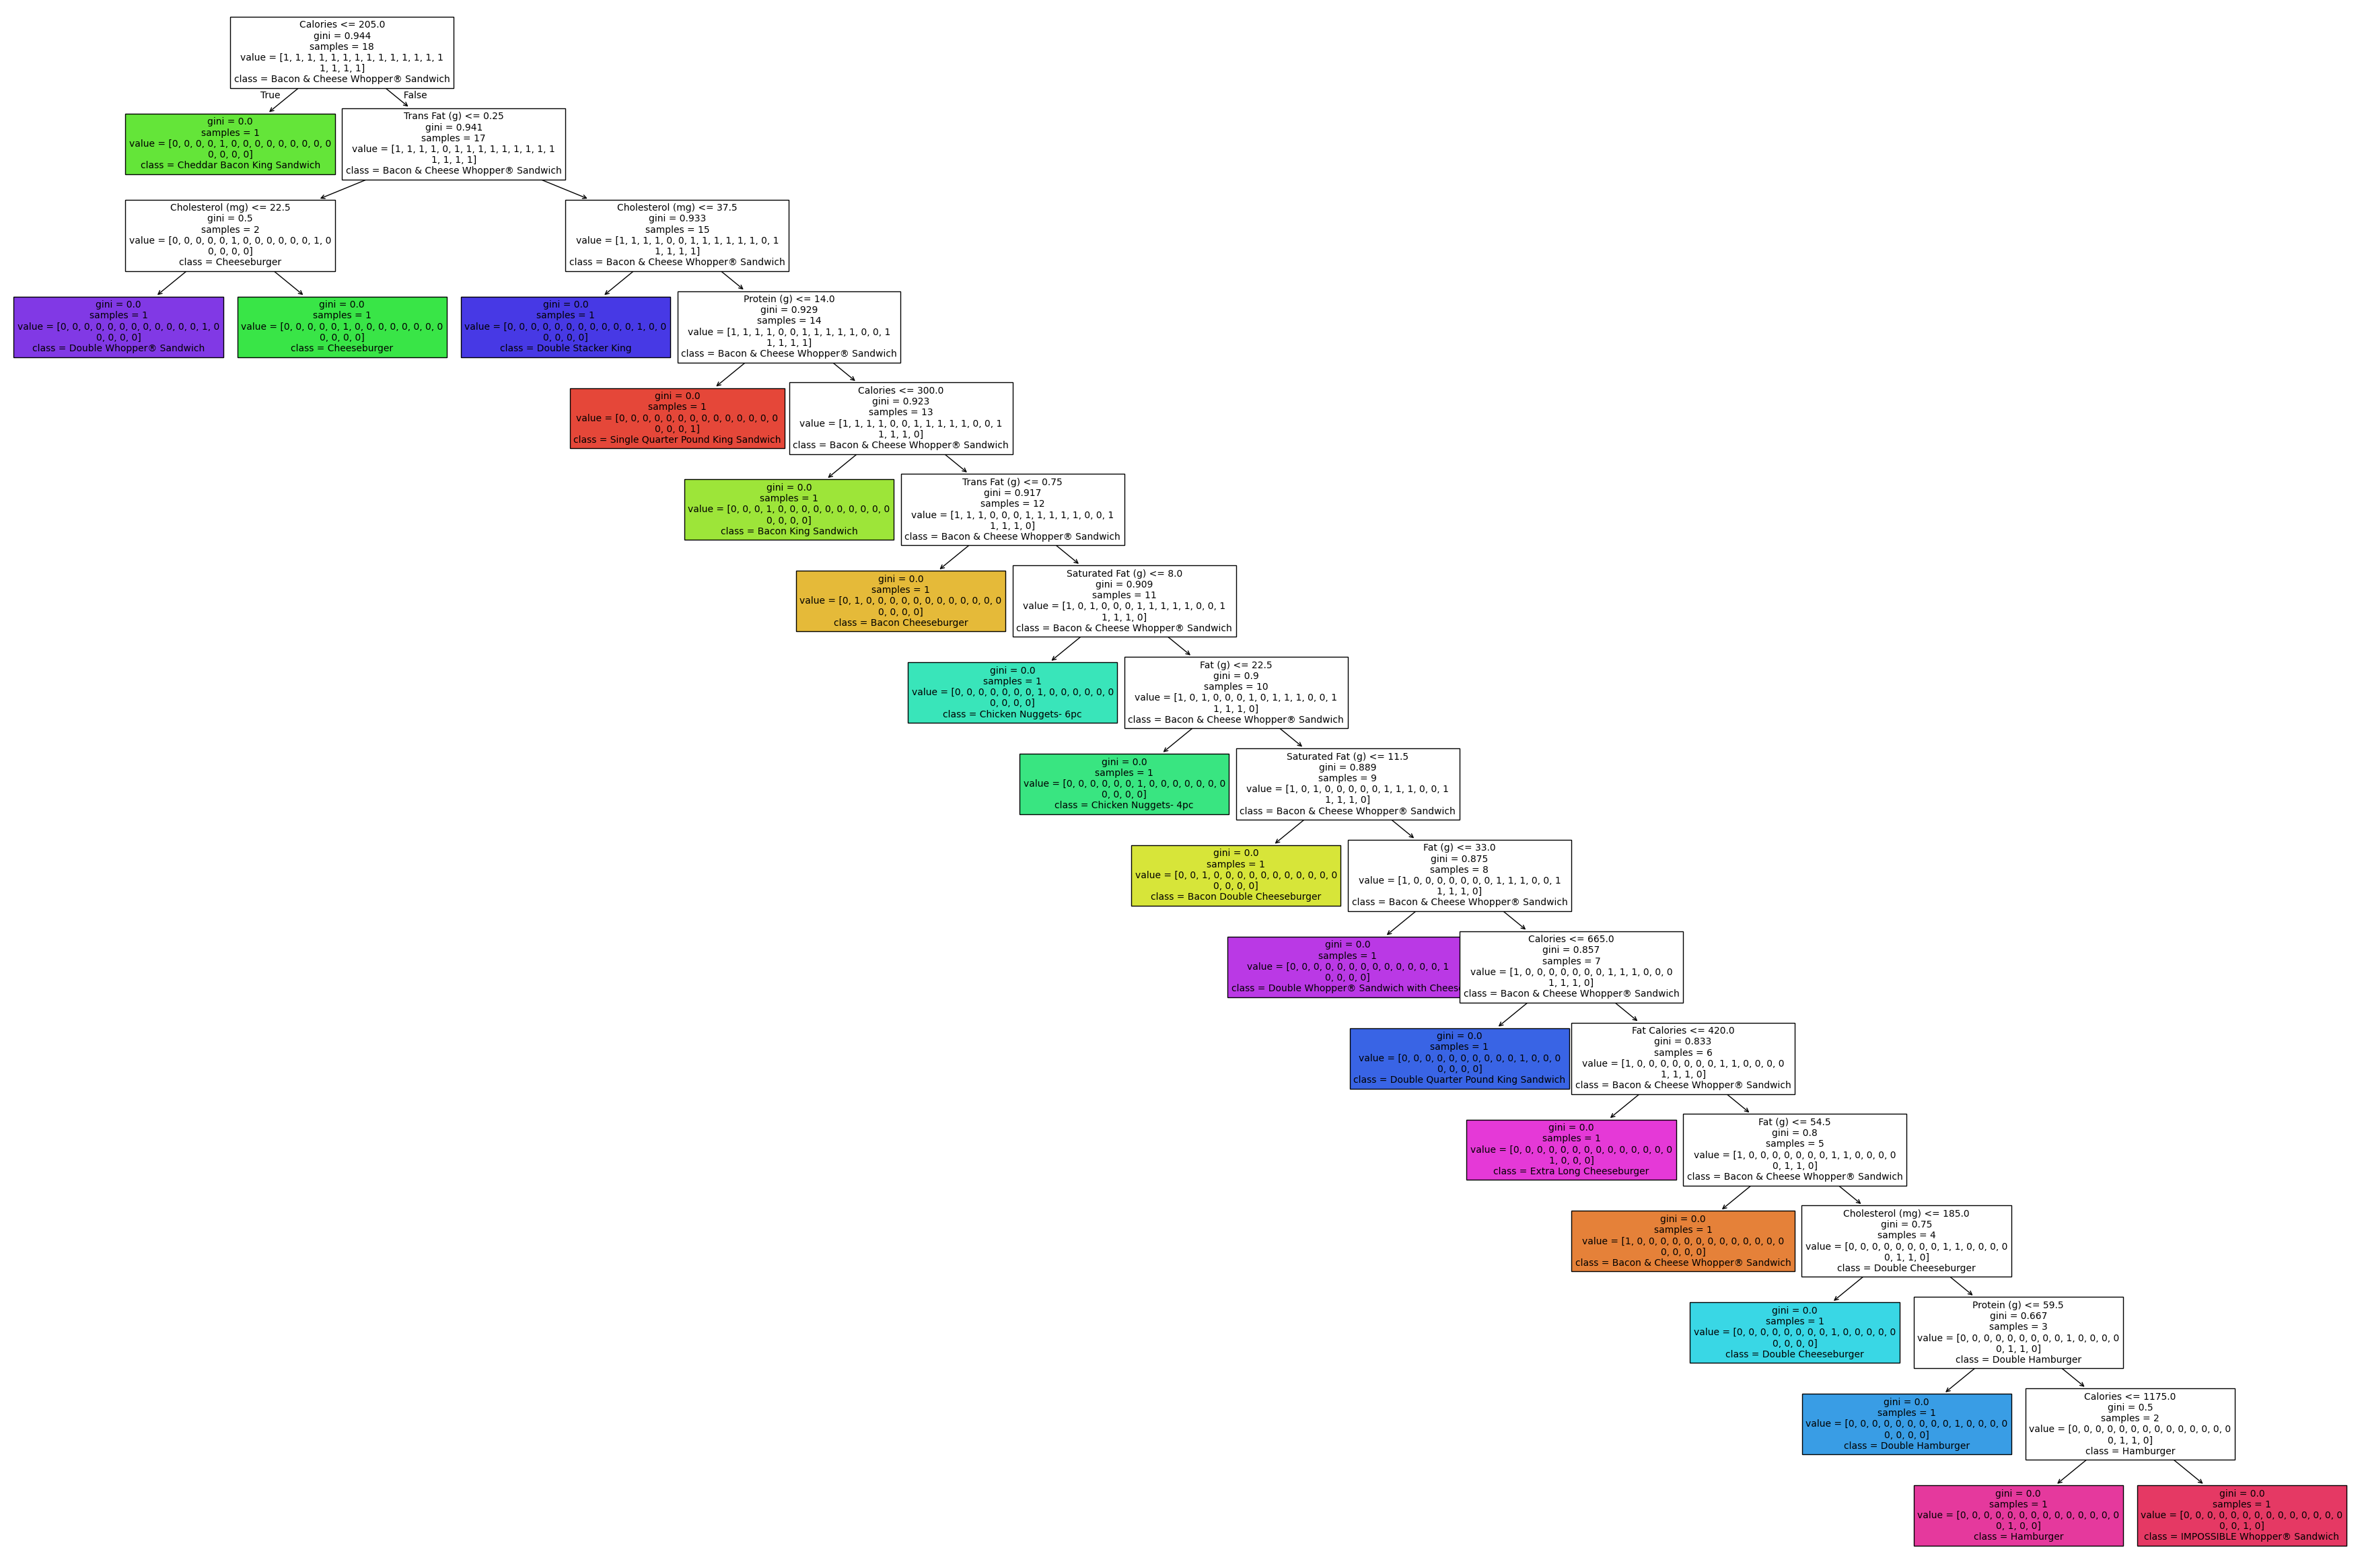

|--- Calories <= 205.00
|   |--- weights: [0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 6
|--- Calories >  205.00
|   |--- Trans Fat (g) <= 0.25
|   |   |--- Cholesterol (mg) <= 22.50
|   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 16
|   |   |--- Cholesterol (mg) >  22.50
|   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 7
|   |--- Trans Fat (g) >  0.25
|   |   |--- Cholesterol (mg) <= 37.50
|   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 15
|   |   |--- Cholesterol (mg) >  37.50
|   |   |   |--- Protein (g) <= 14.00
|   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,

In [49]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Filter the data for the 'Burgers' category
burgers_data = df[df['Category'] == 'Burgers']

# Remove the 'Category' column and prepare features (X) and labels (Y)
X = burgers_data.drop(columns=['Item', 'Category'])
Y = burgers_data['Item']

# Encode the target labels (Item) as integers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)

# Train a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=99)
decision_tree.fit(X_train, Y_train)

# Visualize the decision tree
plt.figure(figsize=(45, 30))
plot_tree(decision_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, fontsize=10)
plt.show()

# Interpret the decision tree as text
tree_rules = export_text(decision_tree, feature_names=list(X.columns), show_weights=True)
print(tree_rules)

***Observation:** The decision tree's initial split was on Calories being the primary factor after which dgini, dietary choices like Cholesterol, Transfat catered to the nutritional preferences and health choices.